In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


## importing all the required modules and libraries.

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import catboost

## Importing the given dataset and analysing the given dataset.

In [3]:
wine = pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")
print(wine.describe())
print(wine.shape)

# This will provide some basic ideas of the given dataset.

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [4]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### This cell will provide the datatypes associated with the given dataset.

In [5]:
print("Data types: \n{}".format(wine.dtypes))

Data types: 
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


## Checking for null values.

In [6]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Dropping the duplicate values.

In [7]:
wine.drop_duplicates(inplace=True)
print(wine)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
5               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

### There's no null values in the given dataset.

## Visualizing with the help of basic violin graphs.

## 1. Fixed acidity data.

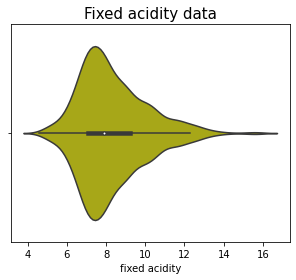

In [8]:
plt.figure(figsize=(5,4))
sns.violinplot(x='fixed acidity',data=wine,color='y');
plt.title("Fixed acidity data",{'fontsize':15});

## 2. Volatile acidity data.

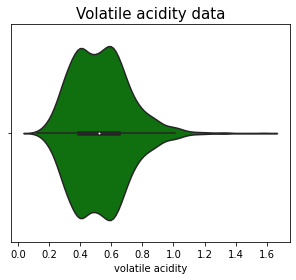

In [9]:
plt.figure(figsize=(5,4))
sns.violinplot(x='volatile acidity',data=wine,color='g');
plt.title("Volatile acidity data",{'fontsize':15});

## 3. Citric acidity data.

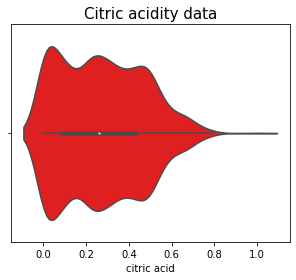

In [10]:
plt.figure(figsize=(5,4))
sns.violinplot(x='citric acid',data=wine,color='r');
plt.title("Citric acidity data",{'fontsize':15});

## 4. Residual sugar.

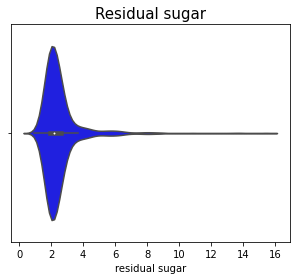

In [11]:
plt.figure(figsize=(5,4))
sns.violinplot(x='residual sugar',data=wine,color='b');
plt.title("Residual sugar",{'fontsize':15});

## 5. Chlorides data.

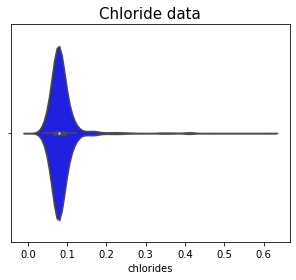

In [12]:
plt.figure(figsize=(5,4))
sns.violinplot(x='chlorides',data=wine,color='b');
plt.title("Chloride data",{'fontsize':15});

## 6. Free sulphur dioxide.

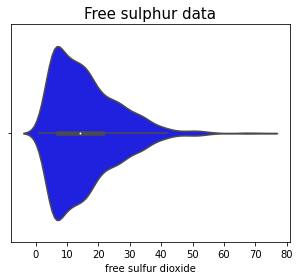

In [13]:
plt.figure(figsize=(5,4))
sns.violinplot(x='free sulfur dioxide',data=wine,color='b');
plt.title("Free sulphur data",{'fontsize':15});

# Complete graph representations.

In [14]:
wine.corr().style.background_gradient(cmap = 'rocket')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


<AxesSubplot:>

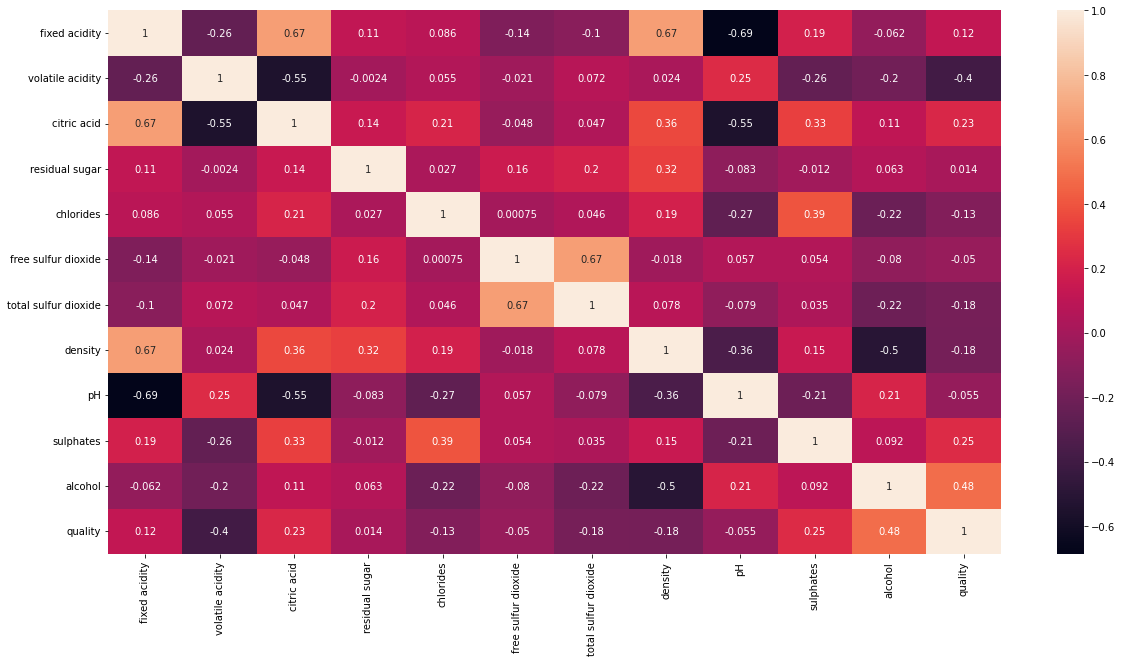

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(wine.corr(), annot=True)

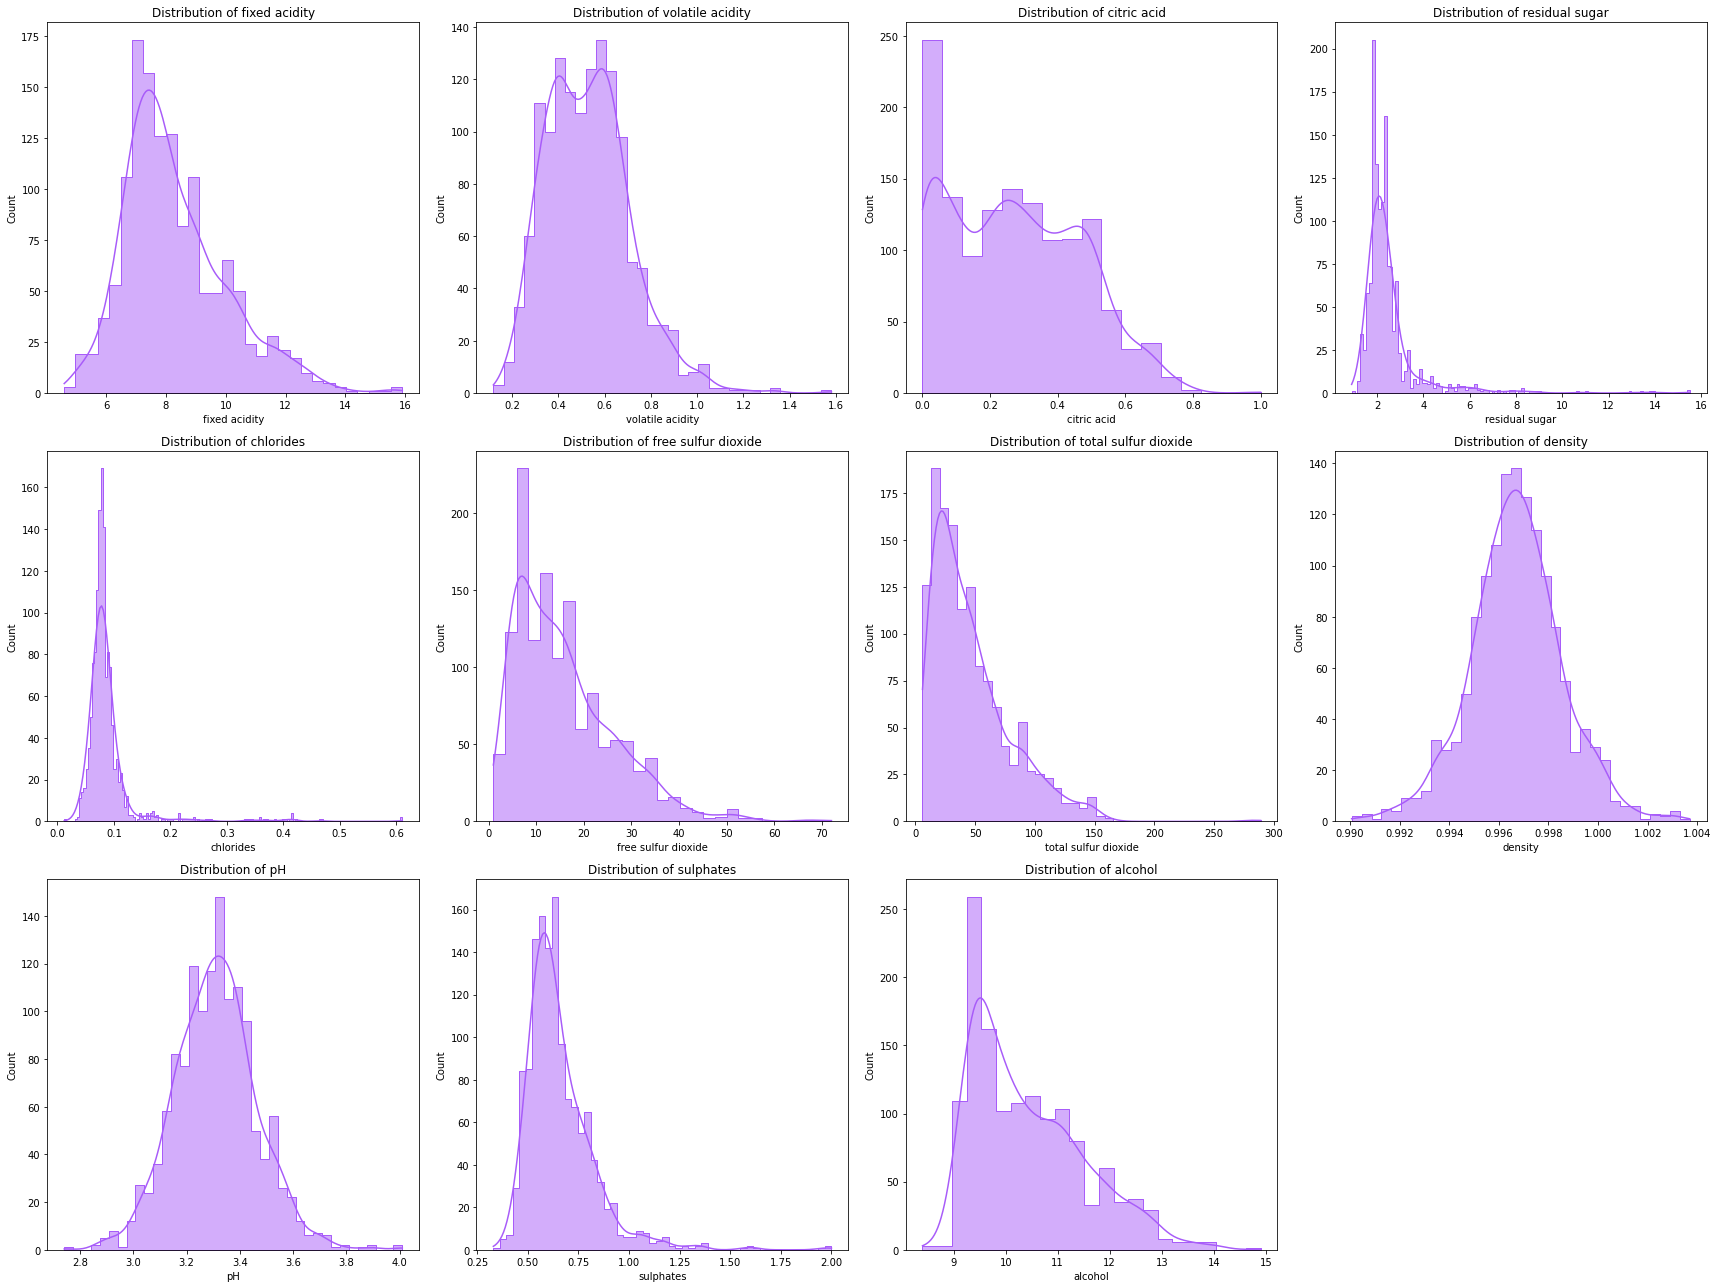

In [16]:
# display(HTML(f"<h3><b style='color:#CE93D8; font-size:30px; text-align:center;'>Distribution of Features</b></h3>"))
feature_cols=wine.columns[:-1].to_numpy()
plt.figure(figsize=(24,18))
for i,col in enumerate(feature_cols):
    plt.subplot(3,4,i+1)
    sns.histplot(data=wine,x=col,kde=True,element='step',color='#A85CF9')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

## Final model building.

In [17]:
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101);
print(f'Shape of the X_train: {X_train.shape}');
print(f'Shape of the X_test: {X_test.shape}');
print(f'Shape of the y_train: {y_train.shape}');
print(f'Shape of the y_test: {y_test.shape}');

Shape of the X_train: (1087, 11)
Shape of the X_test: (272, 11)
Shape of the y_train: (1087,)
Shape of the y_test: (272,)


In [19]:
def model_evaluation(model, X_train, y_train, X_test, y_test):
    print('Starting ...')
    ss = StandardScaler()
    X_train_ss = ss.fit_transform(X_train)
    X_test_ss = ss.fit_transform(X_test)
    print("Scaling process is done ...")
    mod = model.fit(X_train, y_train)
    mod_pred = model.predict(X_test)
    print("Classification report of the Model: \n {}".format(classification_report(y_test, mod_pred)))
    print("Confusion Matrix of the given Model: \n {}".format(confusion_matrix(y_test, mod_pred)))
    print("Accuracy of the Model: \n{}".format(accuracy_score(y_test, mod_pred)))
    print("Evaluation process is done ...")
    return mod

### Random forest classifier.

In [20]:
rfc = RandomForestClassifier()
model_evaluation(rfc, X_train, y_train, X_test, y_test)

Starting ...
Scaling process is done ...
Classification report of the Model: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         7
           5       0.65      0.73      0.69       115
           6       0.56      0.57      0.57       111
           7       0.50      0.47      0.48        30
           8       0.00      0.00      0.00         6

    accuracy                           0.59       272
   macro avg       0.29      0.29      0.29       272
weighted avg       0.56      0.59      0.57       272

Confusion Matrix of the given Model: 
 [[ 0  1  2  0  0  0]
 [ 0  0  2  5  0  0]
 [ 0  1 84 28  2  0]
 [ 0  0 40 63  8  0]
 [ 0  1  1 14 14  0]
 [ 0  0  0  2  4  0]]
Accuracy of the Model: 
0.5919117647058824
Evaluation process is done ...


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForestClassifier()

## Decission tree classifier.

In [21]:
dtc = DecisionTreeClassifier()
model_evaluation(dtc, X_train, y_train, X_test, y_test)

Starting ...
Scaling process is done ...
Classification report of the Model: 
               precision    recall  f1-score   support

           3       0.20      0.33      0.25         3
           4       0.00      0.00      0.00         7
           5       0.61      0.60      0.60       115
           6       0.50      0.42      0.46       111
           7       0.26      0.37      0.30        30
           8       0.25      0.17      0.20         6

    accuracy                           0.47       272
   macro avg       0.30      0.32      0.30       272
weighted avg       0.50      0.47      0.48       272

Confusion Matrix of the given Model: 
 [[ 1  1  0  0  1  0]
 [ 0  0  4  2  1  0]
 [ 3  5 69 30  8  0]
 [ 1  4 38 47 18  3]
 [ 0  2  3 14 11  0]
 [ 0  0  0  1  4  1]]
Accuracy of the Model: 
0.4742647058823529
Evaluation process is done ...


DecisionTreeClassifier()

## Support vector clustering.

In [22]:
svc = SVC()
model_evaluation(svc, X_train, y_train, X_test, y_test)

Starting ...
Scaling process is done ...
Classification report of the Model: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         7
           5       0.64      0.48      0.55       115
           6       0.45      0.76      0.57       111
           7       1.00      0.03      0.06        30
           8       0.00      0.00      0.00         6

    accuracy                           0.51       272
   macro avg       0.35      0.21      0.20       272
weighted avg       0.57      0.51      0.47       272

Confusion Matrix of the given Model: 
 [[ 0  0  0  3  0  0]
 [ 0  0  1  6  0  0]
 [ 0  0 55 60  0  0]
 [ 0  0 27 84  0  0]
 [ 0  0  3 26  1  0]
 [ 0  0  0  6  0  0]]
Accuracy of the Model: 
0.5147058823529411
Evaluation process is done ...


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC()

In [23]:
xgb = xgboost.XGBClassifier()
model_evaluation(xgb, X_train, y_train, X_test, y_test)

Starting ...
Scaling process is done ...


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:47:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification report of the Model: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         7
           5       0.59      0.68      0.63       115
           6       0.53      0.49      0.51       111
           7       0.39      0.43      0.41        30
           8       0.00      0.00      0.00         6

    accuracy                           0.53       272
   macro avg       0.25      0.27      0.26       272
weighted avg       0.51      0.53      0.52       272

Confusion Matrix of the given Model: 
 [[ 0  0  3  0  0  0]
 [ 0  0  4  3  0  0]
 [ 2  1 78 31  3  0]
 [ 0  1 43 54 13  0]
 [ 0  1  4 11 13  1]
 [ 0  0  0  2  4  0]]


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [24]:
cat = catboost.CatBoostClassifier()
model_evaluation(cat, X_train, y_train, X_test, y_test)

Starting ...
Scaling process is done ...
Learning rate set to 0.079464
0:	learn: 1.6880255	total: 60.7ms	remaining: 1m
1:	learn: 1.6089450	total: 66.6ms	remaining: 33.2s
2:	learn: 1.5355943	total: 72.1ms	remaining: 24s
3:	learn: 1.4738014	total: 78ms	remaining: 19.4s
4:	learn: 1.4200066	total: 84ms	remaining: 16.7s
5:	learn: 1.3730933	total: 89.8ms	remaining: 14.9s
6:	learn: 1.3309085	total: 95.5ms	remaining: 13.6s
7:	learn: 1.2931865	total: 101ms	remaining: 12.5s
8:	learn: 1.2605784	total: 107ms	remaining: 11.8s
9:	learn: 1.2301887	total: 113ms	remaining: 11.1s
10:	learn: 1.2035073	total: 118ms	remaining: 10.6s
11:	learn: 1.1767534	total: 123ms	remaining: 10.1s
12:	learn: 1.1530041	total: 131ms	remaining: 9.95s
13:	learn: 1.1297280	total: 137ms	remaining: 9.62s
14:	learn: 1.1087942	total: 141ms	remaining: 9.29s
15:	learn: 1.0913360	total: 147ms	remaining: 9.03s
16:	learn: 1.0756372	total: 152ms	remaining: 8.81s
17:	learn: 1.0593976	total: 158ms	remaining: 8.6s
18:	learn: 1.0447428	tot

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Thank you for showing interest in this notebook, feel free to use any code and algorithm.